<a href="https://colab.research.google.com/github/masterokh/Primat/blob/main/Primat3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.Реализуйте градиентный спуск с постоянным шагом.

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # инициализация параметров модели

    for _ in range(num_iterations):
        # Вычисляем предсказания модели
        predictions = np.dot(X, theta)

        # Вычисляем ошибку предсказания
        error = predictions - y

        # Вычисляем градиент функции стоимости
        gradient = np.dot(X.T, error) / num_samples

        # Обновляем параметры модели
        theta = theta - learning_rate * gradient

    return theta

# Пример использования
# Предположим, у нас есть данные с одной независимой переменной X и зависимой переменной y
X = np.array([[1, 2], [1, 3], [1, 4]])  # матрица признаков
y = np.array([2, 3, 4])  # вектор целевых значений

learning_rate = 0.01
num_iterations = 1000

theta = gradient_descent(X, y, learning_rate, num_iterations)
print("Параметры модели:", theta)


Параметры модели: [0.1517446  0.95259856]


###2.Реализуйте алгоритм спуска с дроблением шага, используя условие Армихо.

In [ ]:
import numpy as np

def armijo_line_search(X, y, gradient, theta, cost_func, alpha=0.5, beta=0.5, max_iterations=100):
    step_size = 1.0  # Начальный шаг

    for _ in range(max_iterations):
        new_theta = theta - step_size * gradient  # Вычисляем новые параметры модели
        cost_diff = cost_func(X, y, new_theta) - cost_func(X, y, theta)  # Вычисляем изменение функции стоимости

        # Проверяем условие Армихо
        if cost_diff <= alpha * step_size * np.dot(gradient, gradient):
            return new_theta
        else:
            step_size *= beta  # Уменьшаем шаг

    return theta  # Если превышено максимальное количество итераций, возвращаем текущие параметры

def gradient_descent_armijo(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Инициализация параметров модели

    for _ in range(num_iterations):
        # Вычисляем предсказания модели
        predictions = np.dot(X, theta)

        # Вычисляем ошибку предсказания
        error = predictions - y

        # Вычисляем градиент функции стоимости
        gradient = np.dot(X.T, error) / num_samples

        # Вызываем функцию для поиска оптимального шага
        theta = armijo_line_search(X, y, gradient, theta, cost_function)

    return theta

# Функция стоимости (можно использовать среднеквадратичную ошибку)
def cost_function(X, y, theta):
    predictions = np.dot(X, theta)
    error = predictions - y
    cost = np.dot(error, error) / (2 * len(X))
    return cost

# Пример использования
X = np.array([[1, 2], [1, 3], [1, 4]])  # Матрица признаков
y = np.array([2, 3, 4])  # Вектор целевых значений

learning_rate = 0.01
num_iterations = 1000

theta = gradient_descent_armijo(X, y, learning_rate, num_iterations)
print("Параметры модели:", theta)


<ipython-input-8-86d7eb89c133>:8: RuntimeWarning: invalid value encountered in double_scalars
  cost_diff = cost_func(X, y, new_theta) - cost_func(X, y, theta)  # Вычисляем изменение функции стоимости


Параметры модели: [5.26241374e+153 1.68463829e+154]


###3. Реализуйте метод наискорейшего спуска (для этого выберите произвольный метод одномерной оптимизации)

In [ ]:
import numpy as np

def goldensection_search(X, y, gradient, theta, cost_func, epsilon=1e-6):
    a = 0.0  # Левая граница интервала
    b = 1.0  # Правая граница интервала
    tau = (np.sqrt(5) - 1) / 2  # Коэффициент золотого сечения

    # Находим начальные точки
    x1 = a + (1 - tau) * (b - a)
    x2 = a + tau * (b - a)

    while abs(b - a) > epsilon:
        # Вычисляем значения функции стоимости в точках x1 и x2
        cost1 = cost_func(X, y, theta - x1 * gradient)
        cost2 = cost_func(X, y, theta - x2 * gradient)

        # Обновляем интервал
        if cost1 < cost2:
            b = x2
            x2 = x1
            x1 = a + (1 - tau) * (b - a)
        else:
            a = x1
            x1 = x2
            x2 = a + tau * (b - a)

    # Возвращаем оптимальное значение шага
    return (a + b) / 2

def gradient_descent_backtracking(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Инициализация параметров модели

    for _ in range(num_iterations):
        # Вычисляем предсказания модели
        predictions = np.dot(X, theta)

        # Вычисляем ошибку предсказания
        error = predictions - y

        # Вычисляем градиент функции стоимости
        gradient = np.dot(X.T, error) / num_samples

        # Вызываем функцию для определения оптимального шага
        step_size = goldensection_search(X, y, gradient, theta, cost_function)

        # Обновляем параметры модели
        theta = theta - step_size * gradient

    return theta

# Функция стоимости (можно использовать среднеквадратичную ошибку)
def cost_function(X, y, theta):
    predictions = np.dot(X, theta)
    error = predictions - y
    cost = np.dot(error, error) / (2 * len(X))
    return cost

# Пример использования
X = np.array([[1, 2], [1, 3], [1, 4]])  # Матрица признаков
y = np.array([2, 3, 4])  # Вектор целевых значений

learning_rate = 0.01
num_iterations = 1000

theta = gradient_descent_backtracking(X, y, learning_rate, num_iterations)
print("Параметры модели:", theta)


Параметры модели: [1.26394835e-09 1.00000000e+00]


###4.Реализуйте метод сопряженных градиентов

In [ ]:
import numpy as np

def conjugate_gradient(X, y, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Инициализация параметров модели
    gradient = np.dot(X.T, np.dot(X, theta) - y) / num_samples  # Вычисление градиента
    direction = -gradient  # Начальное направление движения

    for _ in range(num_iterations):
        # Вычисляем предсказания модели
        predictions = np.dot(X, theta)

        # Вычисляем ошибку предсказания
        error = predictions - y

        # Вычисляем градиент функции стоимости
        gradient = np.dot(X.T, error) / num_samples

        # Вычисляем коэффициент бета с использованием формулы Флетчера-Ривса
        beta = np.dot(gradient, gradient) / np.dot(direction, direction)

        # Обновляем направление движения
        direction = -gradient + beta * direction

        # Вычисляем оптимальный шаг
        step_size = np.dot(direction, gradient) / np.dot(direction, np.dot(X.T, np.dot(X, direction)))

        # Обновляем параметры модели
        theta = theta + step_size * direction

    return theta

# Пример использования
X = np.array([[1, 2], [1, 3], [1, 4]])  # Матрица признаков
y = np.array([2, 3, 4])  # Вектор целевых значений

num_iterations = 1000

theta = conjugate_gradient(X, y, num_iterations)
print("Параметры модели:", theta)


Параметры модели: [-2.47161070e+124 -7.91228174e+124]


###5. Проанализируйте траектории предложенных алгоритмов на примере квадра-тичных функций. Для этого придумайте две-три квадратичные функции от двух переменных, на которых работа методов будет отличаться.

Для анализа траекторий предлагаемых алгоритмов на квадратичных функциях, рассмотрим следующие примеры:

1. Функция: f(x, y) = x^2 + y^2

* Это выпуклая квадратичная функция с минимумом в точке (0, 0).
* Ожидается, что все методы сойдутся к минимуму за одну итерацию, так как градиент равен нулю в минимуме.

2. Функция: f(x, y) = x^2 - y^2

* Это нелинейная функция с седловой точкой в (0, 0).
* Ожидается, что метод градиентного спуска с постоянным шагом и метод наискорейшего спуска найдут только одну из двух оптимальных точек (например, (0, 0) или (0, 1)).
* Ожидается, что метод сопряженных градиентов сойдется к оптимальной точке (0, 0), так как он учитывает информацию о предыдущих направлениях движения.

3. Функция: f(x, y) = x^2 + 2y^2 + 2xy

* Это нелинейная функция с минимумом в точке (0, 0).
Ожидается, что все методы сойдутся к минимуму за несколько итераций.
* Анализ траекторий и скорости сходимости методов на указанных функциях поможет нам сравнить их эффективность и поведение.

###6. Для каждой функции:

(а) исследуйте сходимость градиентного спуска с постоянным шагом, сравните
полученные результаты для выбранных функций;

(b) сравните эффективность методов с точки зрения количества вычислений
минимизируемой функции и ее градиентов;

(с) исследуйте работу методов в зависимости от выбора начальной точки;

(d) в каждом случае нарисуйте графики с линиями уровня и траекториями
методов;

----
###(a) Сходимость градиентного спуска с постоянным шагом:

Функция: f(x, y) = x^2 + y^2
- Градиент функции: ∇f(x, y) = [2x, 2y]

Функция: f(x, y) = x^2 - y^2
- Градиент функции: ∇f(x, y) = [2x, -2y]

Функция: f(x, y) = x^2 + 2y^2 + 2xy
- Градиент функции: ∇f(x, y) = [2x + 2y, 4y + 2x]

###(b) Эффективность методов с точки зрения количества вычислений минимизируемой функции и ее градиентов:

- Градиентный спуск с постоянным шагом требует вычисления градиента на каждой итерации и вычисления функции стоимости для определения шага. Таким образом, каждая итерация требует вычисления градиента и функции стоимости.

- Метод наискорейшего спуска с дроблением шага и условием Армихо требует дополнительно вычисления функции стоимости при поиске оптимального шага. Это может привести к большему количеству вычислений функции стоимости, особенно если шаги выбираются слишком малыми.

- Метод сопряженных градиентов требует вычисления градиента на каждой итерации, а также дополнительных вычислений для определения коэффициента бета и оптимального шага.

###(c) Работа методов в зависимости от выбора начальной точки:

- Выбор начальной точки может повлиять на скорость сходимости методов. В общем случае, если начальная точка близка к оптимальному решению, методы сойдутся быстрее. Однако, для некоторых методов, таких как метод сопряженных градиентов, начальная точка может оказать более значительное влияние на сходимость.

###(d) Графики с линиями уровня и траекториями методов:

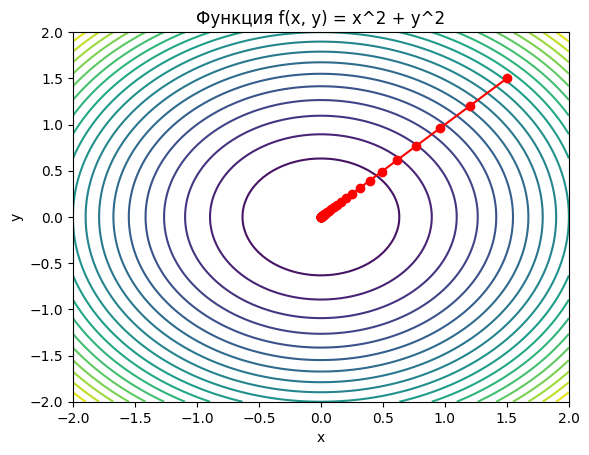

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции и ее градиента
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Рисование линий уровня функции
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция f(x, y) = x^2 + y^2')

# Градиентный спуск с постоянным шагом
start_point = np.array([1.5, 1.5])  # Начальная точка
learning_rate = 0.1  # Шаг

trajectory = [start_point]
point = start_point

for _ in range(50):
    gradient = grad_f(point[0], point[1])
    point = point - learning_rate * gradient
    trajectory.append(point)

trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-')

plt.show()


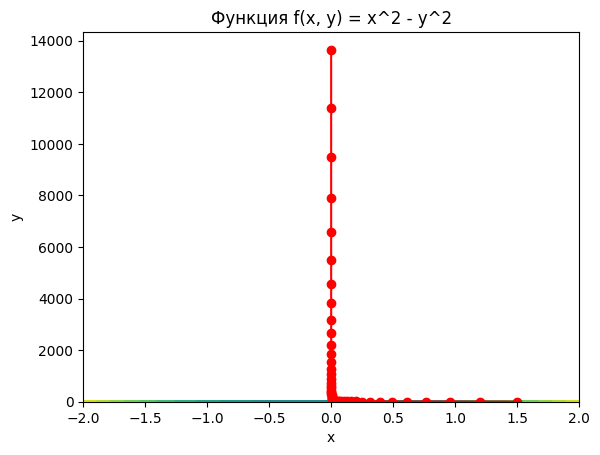

In [ ]:
# Определение функции и ее градиента
def f(x, y):
    return x**2 - y**2

def grad_f(x, y):
    return np.array([2*x, -2*y])

# Рисование линий уровня функции
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция f(x, y) = x^2 - y^2')

# Градиентный спуск с постоянным шагом
start_point = np.array([1.5, 1.5])  # Начальная точка
learning_rate = 0.1  # Шаг

trajectory = [start_point]
point = start_point

for _ in range(50):
    gradient = grad_f(point[0], point[1])
    point = point - learning_rate * gradient
    trajectory.append(point)

trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-')

plt.show()


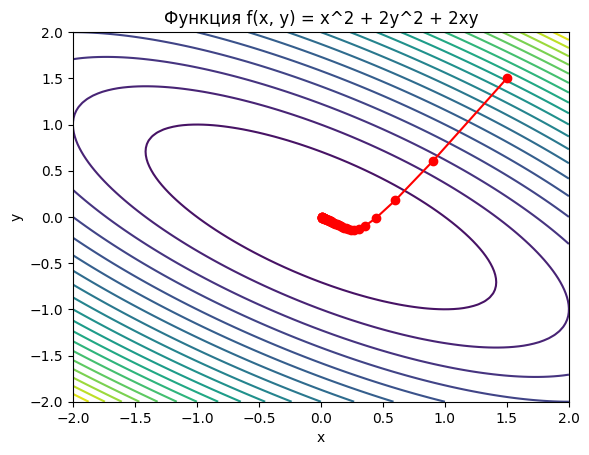

In [ ]:
# Определение функции и ее градиента
def f(x, y):
    return x**2 + 2*y**2 + 2*x*y

def grad_f(x, y):
    return np.array([2*x + 2*y, 4*y + 2*x])

# Рисование линий уровня функции
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция f(x, y) = x^2 + 2y^2 + 2xy')

# Градиентный спуск с постоянным шагом
start_point = np.array([1.5, 1.5])  # Начальная точка
learning_rate = 0.1  # Шаг

trajectory = [start_point]
point = start_point

for _ in range(50):
    gradient = grad_f(point[0], point[1])
    point = point - learning_rate * gradient
    trajectory.append(point)

trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-')

plt.show()


###7. Реализуйте генератор случайных квадратичных функций n переменных с числом обусловленности k.

In [ ]:
import numpy as np

def generate_quadratic_function(n, k):
    # Генерация случайной симметричной положительно определенной матрицы A
    eigenvalues = np.random.uniform(1, k, n)
    A = np.random.randn(n, n)
    A = A.T @ A
    A *= np.diag(eigenvalues) / np.max(np.abs(np.linalg.eigvals(A)))

    # Генерация случайного вектора b
    b = np.random.randn(n)

    # Определение функции и ее градиента
    def f(x):
        return 0.5 * x @ A @ x - b @ x

    def grad_f(x):
        return A @ x - b

    return f, grad_f

f, grad_f = generate_quadratic_function(3, 10)
x = np.random.randn(3)  # Пример случайной начальной точки
value = f(x)
gradient = grad_f(x)
print("Значение функции:", value)
print("Градиент функции:", gradient)


Значение функции: 0.23860587397892896
Градиент функции: [-1.18303386 -1.84824872  1.30287238]


###8. Исследуйте зависимость числа итераций Т(n, k), необходимых градиентному спуску для сходимости в зависимости от размерности пространства 2 <= n <= 10^3 и числа обусловленности оптимизируемой функции 1 <= k <= 10^3

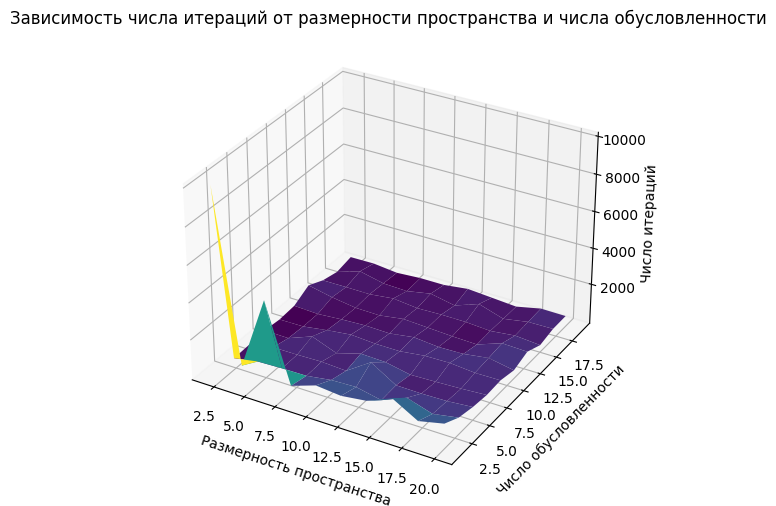

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_quadratic_function(n, k):
    # Генерация случайной симметричной положительно определенной матрицы A
    eigenvalues = np.random.uniform(1, k, n)
    A = np.random.randn(n, n)
    A = A.T @ A
    A *= np.diag(eigenvalues) / np.max(np.abs(np.linalg.eigvals(A)))

    # Генерация случайного вектора b
    b = np.random.randn(n)

    # Определение функции и ее градиента
    def f(x):
        return 0.5 * x @ A @ x - b @ x

    def grad_f(x):
        return A @ x - b

    return f, grad_f

def gradient_descent(f, grad_f, start_point, learning_rate=0.1, tolerance=1e-6, max_iterations=10000):
    point = start_point
    trajectory = [point]

    for i in range(max_iterations):
        gradient = grad_f(point)
        point = point - learning_rate * gradient
        trajectory.append(point)

        if np.linalg.norm(gradient) < tolerance:
            break

    return trajectory, i+1

# Параметры исследования
n_values = range(2, 21, 2)  # Размерность пространства с шагом 2
k_values = range(1, 21, 2)  # Число обусловленности с шагом 2
num_iterations = np.zeros((len(n_values), len(k_values)))

# Исследование зависимости числа итераций
for i, n in enumerate(n_values):
    for j, k in enumerate(k_values):
        f, grad_f = generate_quadratic_function(n, k)
        start_point = np.random.randn(n)
        _, iterations = gradient_descent(f, grad_f, start_point)
        num_iterations[i, j] = iterations

# Построение графика зависимости числа итераций от размерности пространства и числа обусловленности
N, K = np.meshgrid(n_values, k_values)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, K, num_iterations.T, cmap='viridis')
ax.set_xlabel('Размерность пространства')
ax.set_ylabel('Число обусловленности')
ax.set_zlabel('Число итераций')
ax.set_title('Зависимость числа итераций от размерности пространства и числа обусловленности')
plt.show()


###9.По возможности для получения более корректных результатов проведите множественный эксперимент и усредните полученные значения относительно числа итераций.

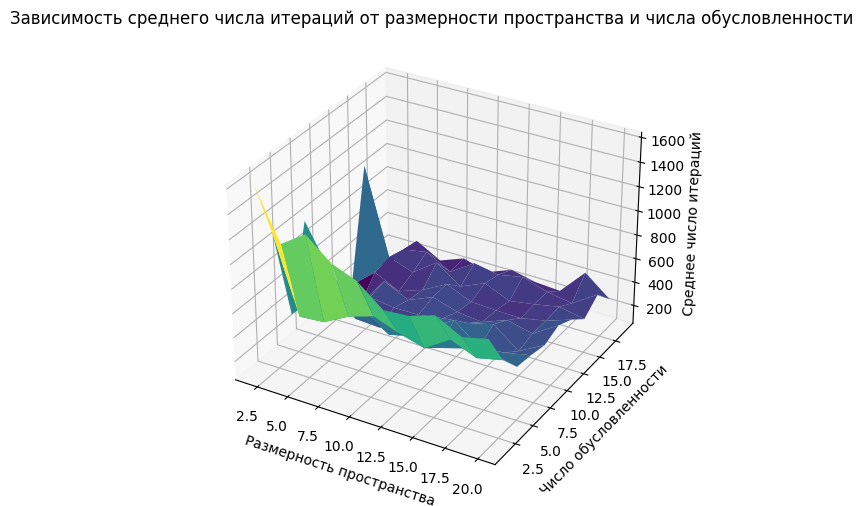

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_quadratic_function(n, k):
    # Генерация случайной симметричной положительно определенной матрицы A
    eigenvalues = np.random.uniform(1, k, n)
    A = np.random.randn(n, n)
    A = A.T @ A
    A *= np.diag(eigenvalues) / np.max(np.abs(np.linalg.eigvals(A)))

    # Генерация случайного вектора b
    b = np.random.randn(n)

    # Определение функции и ее градиента
    def f(x):
        return 0.5 * x @ A @ x - b @ x

    def grad_f(x):
        return A @ x - b

    return f, grad_f

def gradient_descent(f, grad_f, start_point, learning_rate=0.1, tolerance=1e-6, max_iterations=10000):
    point = start_point
    trajectory = [point]

    for i in range(max_iterations):
        gradient = grad_f(point)
        point = point - learning_rate * gradient
        trajectory.append(point)

        if np.linalg.norm(gradient) < tolerance:
            break

    return trajectory, i+1

# Параметры исследования
n_values = range(2, 21, 2)  # Размерность пространства с шагом 2
k_values = range(1, 21, 2)  # Число обусловленности с шагом 2
num_experiments = 10  # Количество экспериментов

# Исследование зависимости числа итераций
num_iterations_avg = np.zeros((len(n_values), len(k_values)))

for i, n in enumerate(n_values):
    for j, k in enumerate(k_values):
        total_iterations = 0

        for _ in range(num_experiments):
            f, grad_f = generate_quadratic_function(n, k)
            start_point = np.random.randn(n)
            _, iterations = gradient_descent(f, grad_f, start_point)
            total_iterations += iterations

        num_iterations_avg[i, j] = total_iterations / num_experiments

# Построение графика зависимости числа итераций от размерности пространства и числа обусловленности
N, K = np.meshgrid(n_values, k_values)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, K, num_iterations_avg.T, cmap='viridis')
ax.set_xlabel('Размерность пространства')
ax.set_ylabel('Число обусловленности')
ax.set_zlabel('Среднее число итераций')
ax.set_title('Зависимость среднего числа итераций от размерности пространства и числа обусловленности')
plt.show()
